# Sistema de ecuaciónes lineales | Resolución en SymPy 

[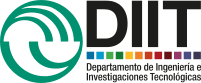](https://ingenieria.unlam.edu.ar/)  
2022 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 

---

En los sistemas mecánicos que se modelicen con coordenadas o velocidades generalizadas relacionadas por ligaduras es probable que las correspondientes ecuaciones de Euler-Lagrange para cada coordenada presenten dependencia con otras, sus velocidades o inclusive sus aceleraciones.

Es de interés para la resolución numérica de la dinámica de sistemas mecánicos obtener expresiones de una particular aceleración generalizada que no sean función de otra.

A continuación se generará un sistema de ecuaciones lineales sin significado ingenieril particular con la finalidad de mostrar como dos alternativas que ofrece la [biblioteca SymPy de álgebra computacional](https://www.sympy.org/es/index.html) lo resuelven en función de una de las derivadas segundas con el tiempo que incluyen.

In [1]:
import sympy as sym # módulo de cálculo simbólico
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [2]:
t = sym.Symbol('t')
m1, m2, m3, g = sym.symbols('m_1, m_2, m_3, g')
y1, y2 = mech.dynamicsymbols('y_1, y_2')

In [3]:
ecuación1 = sym.Eq(
    g* (-m1+ m2+ m3)+ m1* y1.diff(t,2)+ m2* (y1.diff(t,2)- y2.diff(t,2))+ m3* (y1.diff(t,2) + y2.diff(t,2)) ,
    0 )
ecuación1

In [4]:
ecuación2 = sym.Eq(
    g* (m2- m3)+ m2* (y1.diff(t,2)- y2.diff(t,2))- m3* (y1.diff(t,2) + y2.diff(t,2)) ,
    0 )
ecuación2

In [5]:
sistemaEcuaciones = [
    ecuación1,
    ecuación2,
] # lista con ambas ecuaciones

In [6]:
variablesResolución = [
    y1.diff(t,2),
    y2.diff(t,2),
] # lista con variables a despejar (las aceleraciones)

## Alternativa 1 | linsolve


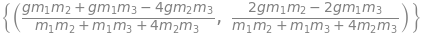

In [7]:
solución_linsolve = sym.linsolve(sistemaEcuaciones, variablesResolución)
solución_linsolve

La función [linsolve](https://docs.sympy.org/latest/modules/solvers/solveset.html?highlight=linsolve#linsolve) devuelve un conjunto matématico finito (`FinitSet`) como solución pues eventualmente esta puede no ser única o ser un conjunto.
Esta estructura de datos Sympy la denota entre llaves.

In [8]:
type(solución_linsolve)

sympy.sets.sets.FiniteSet

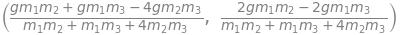

In [9]:
solución_linsolve.args[0]

La función `args` permite seleccionar elementos en el conjunto.
Aquí recupera la tupla (`tuple`) que contiene ambas soluciones.
Esta estructura de datos Sympy la denota entre paréntesis.
En Python los elementos se numeran empezando desde el cero (`0`) por lo que si hay un único elemento en una estructura únicoeste será su número de índice.

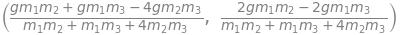

In [10]:
ypp_linsolve = sym.linsolve(sistemaEcuaciones, variablesResolución).args[0]
ypp_linsolve

Con lo anterior se guardaron las soluciones en `ypp_linsolve` lo que permite generar ecuaciones para las soluciones recorriendo el número de orden en la lista de variables.

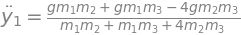

In [11]:
sym.Eq(variablesResolución[0], ypp_linsolve[0]) # Toma el primer elemento de la lista variablesResolución

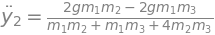

In [12]:
sym.Eq(variablesResolución[1], ypp_linsolve[1]) # Toma el segundo elemento de la lista variablesResolución

## Alternativa 2 | Solve

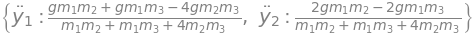

In [13]:
ypp_solve = sym.solve(sistemaEcuaciones, variablesResolución)
ypp_solve

La función `solve` retorna un diccionario (`dict`).
En un diccionario cada término de referencia (`key`) refiere a una deficinión o valor (`value`).
Para recuperar tal valor hay que indicar precisamente el término de interés.

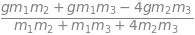

In [14]:
ypp_solve[y1.diff(t,2)]

Esto permite generar ecuaciones para las soluciones recorriendo el número de orden en la lista de variables. 

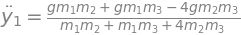

In [15]:
sym.Eq(variablesResolución[0], ypp_solve[variablesResolución[0]])

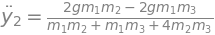

In [16]:
sym.Eq(variablesResolución[1], ypp_solve[variablesResolución[1]])